# **Graph Convolutional Network**

## **A First Approch**

In [215]:
from networkx import karate_club_graph, to_numpy_matrix
import numpy as np
import matplotlib.pyplot as plt

In [216]:
kcg = karate_club_graph()

In [217]:
order = sorted(list(kcg.nodes()))

In [218]:
adj = to_numpy_matrix(kcg, nodelist = order)
I = np.eye(kcg.number_of_nodes())

In [219]:
A_hat = adj + I
D_hat = np.array(A_hat.sum(axis= 0))[0]
D_hat = np.matrix(np.diag(D_hat))

In [220]:
def gcn_layer(A_hat,D_hat, X, W):
    
    convolution = D_hat**(-1)*A_hat*X*W
    
    return np.maximum(convolution, 0)

In [221]:
rng = np.random.RandomState(0)

W_1 = rng.normal(
    loc = 0,
    scale = 1,
    size = (kcg.number_of_nodes(), 4)
)

W_2 = rng.normal(
    loc=0, 
    size=(W_1.shape[1], 2)
)

In [222]:
W_1

array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ,  0.14404357,  1.45427351],
       [ 0.76103773,  0.12167502,  0.44386323,  0.33367433],
       [ 1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502],
       [ 2.26975462, -1.45436567,  0.04575852, -0.18718385],
       [ 1.53277921,  1.46935877,  0.15494743,  0.37816252],
       [-0.88778575, -1.98079647, -0.34791215,  0.15634897],
       [ 1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 ],
       [-0.50965218, -0.4380743 , -1.25279536,  0.77749036],
       [-1.61389785, -0.21274028, -0.89546656,  0.3869025 ],
       [-0.51080514, -1.18063218, -0.02818223,  0.42833187],
       [ 0.06651722,  0.3024719 , -0.63432209, -0.36274117],
       [-0.67246045, -0.35955316, -0.81314628, -1.7262826 ],
       [ 0.17742614, -0.

In [223]:
W_2

array([[ 0.57659082, -0.20829876],
       [ 0.39600671, -1.09306151],
       [-1.49125759,  0.4393917 ],
       [ 0.1666735 ,  0.63503144]])

In [224]:
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)

output = H_2

In [226]:
H_1.shape

(34, 4)

In [227]:
H_2.shape

(34, 2)

In [207]:
feature_representations = np.array([ np.array(output)[node] for node in kcg.nodes()])

In [208]:
labels = []

for i in np.arange(len(kcg.nodes)):
    
    label = kcg.nodes()[i]['club']
    
    if 'Mr. Hi' == label:
        labels.append(1)
    else:
        labels.append(0)

In [209]:
def filters(labels):
    
    values = np.unique(labels)
    
    n = len(values)
    
    f = []
    
    for v in values:
        
        f.append(labels == v)
    
    return f, values

In [210]:
flt, values = filters(np.array(labels))

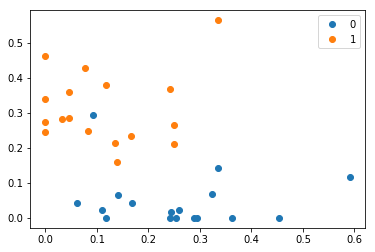

In [211]:
for f, v in zip(flt, values):
    plt.plot(feature_representations[f][:, 0], feature_representations[f][:, 1], 'o', label = v)

plt.legend()

In [214]:
!pip install mxnet

  Created wheel for numpy: filename=numpy-1.16.6-cp38-cp38-win_amd64.whl size=3913813 sha256=65f18015749e1437d9f85afb90ee52dbd8367a9466609a8088b57580d1e8a3d6
  Stored in directory: c:\users\giovanni\appdata\local\pip\cache\wheels\22\6f\a6\069db0c95f9bb6b73e07da014891c58460fef1eb84f49576f0
Successfully built numpy
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.4
    Uninstalling urllib3-1.26.4:
      Successfully uninstalled urllib3-1.26.4
  Attempting uninstall: idna
    Found existing installation: idna 2.10
    Uninstalling idna-2.10:
      Successfully uninstalled idna-2.10
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: numpy
    Found existing installation: num

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

